# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [23]:
employee = pd.read_csv("data/Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1

employee.groupby("Department").agg({"Salary":"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [19]:
# Method 2
employee.pivot_table(index="Department",values="Salary",aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [11]:
employee.pivot_table(index=["Department","Title"],values="Salary",aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
employee.pivot_table(index=["Title"],values=["Salary","Years"],aggfunc=np.mean)


,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [22]:
employee.pivot_table(index=["Department","Title"],values=["Salary","Name"],aggfunc={"Salary":np.mean,"Name":"count"}).rename(columns={"Name":"Number_of_employees"})


Number_of_employees  Salary
Department Title                                 
HR         VP                           1    70.0
           analyst                      2    32.5
IT         VP                           1    70.0
           analyst                      2    32.5
           associate                    1    60.0
Sales      associate                    2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [28]:
employee.pivot_table(index=["Department","Title"],values=["Salary"],aggfunc=[np.median,min,max,np.std])

#The standard deviation of "HR-VP", "IT-VP" and "IT-associate" is NaN because there is only one employee with such combination of department and job title.

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [30]:
employee.pivot_table(index=["Department","Title"],values=["Salary"],aggfunc=[np.median,min,max,np.std]).fillna(0)


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [33]:
employee.pivot_table(index=["Department"],values=["Salary","Name"],aggfunc={"Salary":"sum","Name":"count"}).rename(columns={"Name":"Number_of_employees","Salary":"Sum_of_salaries"})


,Number_of_employees,Sum_of_salaries
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [35]:
employee.pivot_table(index=["Department","Title"],values=["Years","Salary"],aggfunc={"Years":"sum","Salary":np.mean}).rename(columns={"Name":"Total_years","Salary":"Mean_salary"})



Mean_salary  Years
Department Title                        
HR         VP                70.0      8
           analyst           32.5      6
IT         VP                70.0      8
           analyst           32.5      3
           associate         60.0      7
Sales      associate         55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [42]:
def aggreg_function(x):
    return (x.sum()-x.max())/(x.count()-1)

employee.pivot_table(index=["Department"],values=["Salary"],aggfunc=aggreg_function)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [43]:
fitbit = pd.read_csv("data/Fitbit.csv")
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [44]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [45]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [46]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

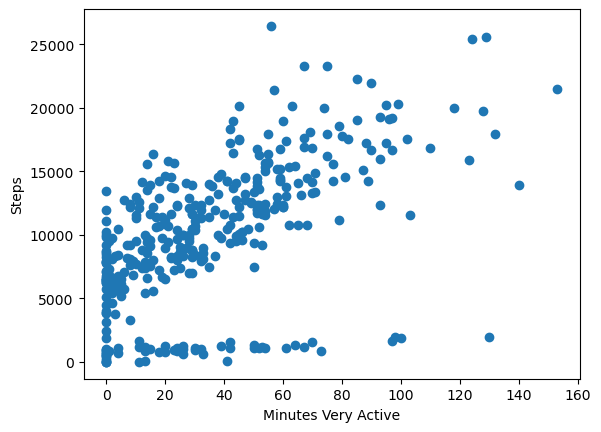

In [50]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# A 0.57 correlation indicates that there is a moderate linear relationship, meaning that if the "Minutes 
# Very Active" increases, then "Steps" increases as well. This can also be observed in the scatter plot.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [51]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])


0.07690608062990092

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

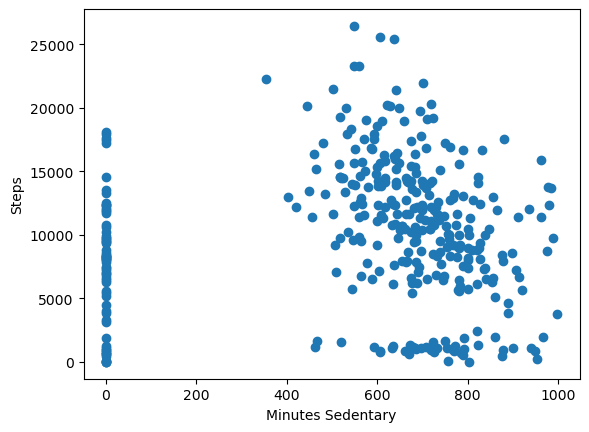

In [53]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

#There is no linear relationship between the Minutes Sedentary and the Steps.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [54]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

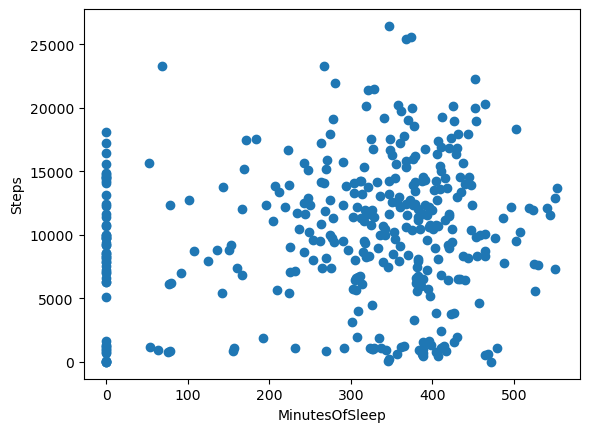

In [55]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

#There is no linear relationship between the MinutesOfSleep and the Steps.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [60]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [63]:
cor_fit["Steps"].sort_values(ascending=False)

# The features "Minutes Very Active", "Floors" and "Calorie burned" have moderate correlation with the feature "Steps"

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [64]:
time_grades = pd.read_csv("data/Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

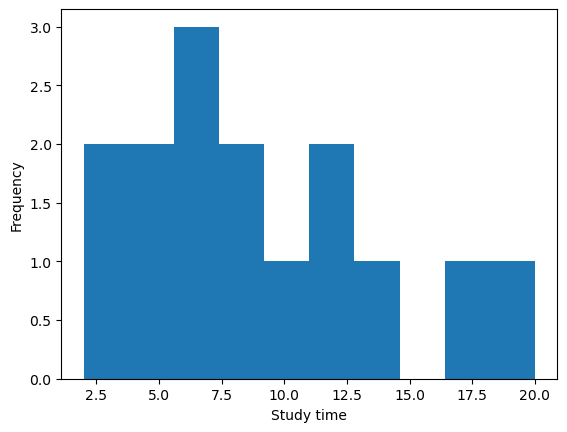

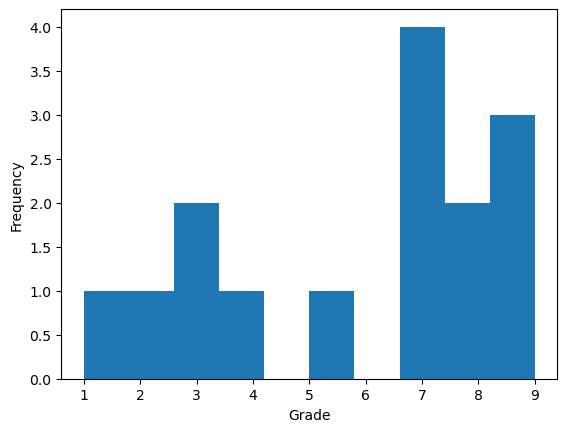

In [70]:
plt.hist(time_grades["Study time"])
plt.xlabel("Study time")
plt.ylabel("Frequency")
plt.show()

plt.hist(time_grades["Grade"])
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [74]:
print("Pearson correlation: ",time_grades['Study time'].corr(time_grades['Grade']))
print("Spearman correlation: ",time_grades['Study time'].corr(time_grades['Grade'], method='spearman'))

# Both correlations are close to 1, so there is a correlation between study time and Grade

Pearson correlation:  0.7980456073578857
Spearman correlation:  0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

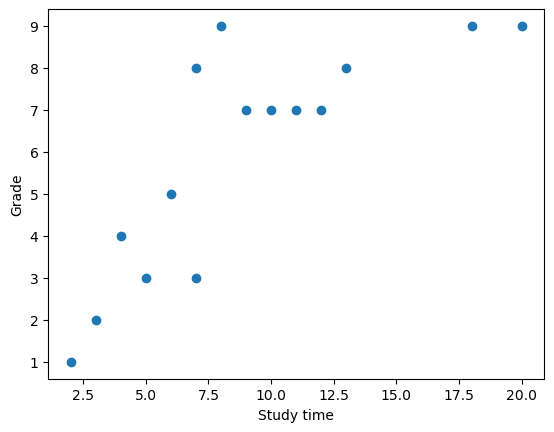

In [75]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()

# The plot also indicates that there is a correlation between study time and Grade

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# The Pearson correlation measures linear correlation.
# The Spearman correlation is a non-parametric measure of correlation, which measures relationships between variables that are not necessarily linear.

